In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Bonus Material: The Humble For Loop

Much of numerical computing consists of populating an array of some sort. The general concept is **looping**, and there is a lot to discover about how to write loops in Python.

## (1) Filling a list

### Using a for loop

This is often the most flexible and simplest method to populate a list or array for beginners in Python . Traditionally, the for loop is discouraged in interpreted languages because it is slow. However, the for loop is amenable to JIT compilation that in many cases out-performs the vectorized version.

In [2]:
n = 10
xs = []
for i in range(n):
    xs.append(i**2)
xs

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Using a list comprehension

This is just syntactic sugar for the for loop. If you are writing a pure python  program, list comprehensions and the related generator expressions, set comprehension, and dictionary comprehension are very slick. The big disadvantage is that these forms are currently not supported by the `numba` JIT compiler.

In [3]:
n = 10
xs = [i**2 for i in range(n)]
xs

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Using `map`

This is a "functional" style of writing the for loop, and provides a higher level of abstraction. As a result, the `map` function is generic and can be used in different parallel or concurrent applications. We will see quite a lot of this functional style being used in the course for this reason, especially in the parallel and distributed computing sections.

In [4]:
n = 10
xs = list(map(lambda x: x**2, range(n)))
xs

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

#### Python guidelines encourage use of named functions rather than lambdas

In [5]:
def square(x):
    return x**2

xs = list(map(square, range(n)))
xs

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Use vectorization

Traditionally, vectorization with `numpy` universal functions is the way to write fast numerical programs in interpreted languages such as Python. We see a lot of vectorized code in the course too.

In [6]:
import numpy as np

In [7]:
n = 10
xs = np.arange(n)**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## (2) Filling a list conditionally

### Using a for loop

In [8]:
n = 10
xs = []
for i in range(n):
    if i % 2 ==0:
        xs.append(i**2)
xs

[0, 4, 16, 36, 64]

### Using a list comprehension

In [9]:
n = 10
xs = [i**2 for i in range(n) if i%2 == 0]
xs

[0, 4, 16, 36, 64]

### Using `map`

In [10]:
n = 10
xs = list(map(lambda x: x**2, 
              filter(lambda x: x%2==0, range(n))))
xs

[0, 4, 16, 36, 64]

#### Python guidelines encourage use of named functions rather than lambdas

In [11]:
def square(x):
    return x**2

def is_even(x):
    return x%2 == 0

xs = list(map(square, 
              filter(is_even, range(n))))
xs

[0, 4, 16, 36, 64]

### Use vectorization

In [12]:
import numpy as np

In [13]:
n = 10
xs = np.arange(n)
xs = xs[xs % 2 == 0]
xs = xs**2
xs

array([ 0,  4, 16, 36, 64])

## (3) Writing as functions

In [14]:
def make_squares_for(n):
    xs = []
    for i in range(n):
        xs.append(i**2)
    return xs

In [15]:
make_squares_for(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [16]:
def make_squares_lc(n):
    return [x**2 for x in range(n)]

In [17]:
make_squares_lc(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [18]:
def make_squares_map(n):
    return list(map(square, range(n)))

In [19]:
make_squares_map(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [20]:
def make_squares_vec(n):
    return np.arange(n)**2

In [21]:
make_squares_vec(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## (4) Timing

In [22]:
n = 1000000
%timeit make_squares_for(n)
%timeit make_squares_lc(n)
%timeit make_squares_map(n)
%timeit make_squares_vec(n)

1 loop, best of 3: 657 ms per loop
1 loop, best of 3: 611 ms per loop
1 loop, best of 3: 811 ms per loop
100 loops, best of 3: 9.82 ms per loop


## (5) Compilation

In [23]:
from numba import njit

In [24]:
make_squares_for_numba = njit()(make_squares_for)
make_squares_for_numba(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [25]:
make_squares_vec_numba = njit()(make_squares_vec)
make_squares_vec_numba(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [26]:
n = 1000000
%timeit make_squares_for_numba(n)
%timeit make_squares_vec_numba(n)

10 loops, best of 3: 103 ms per loop
100 loops, best of 3: 10 ms per loop


#### Why is the compiled for loop slower?

Here we see the benefits to pre-allocating storage.

In [27]:
@njit
def make_squares_for_numba_prealloc(n):
    xs = np.empty(n, dtype=np.int64)
    for i in range(n):
        xs[i] = i**2
    return xs

In [28]:
make_squares_for_numba_prealloc(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [29]:
n = 1000000
%timeit make_squares_for_numba(n)
%timeit make_squares_for_numba_prealloc(n)

10 loops, best of 3: 104 ms per loop
100 loops, best of 3: 2.66 ms per loop


## (6) Vectorizing scalar functions

In [30]:
@np.vectorize
def square_numpy(x):
    return x**2

In [31]:
square_numpy(range(10))

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [32]:
from numba import vectorize

In [33]:
@vectorize('int64(int64)')
def square_numba(x):
    return x**2

In [34]:
square_numba(range(10))

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [35]:
n = 1000000
%timeit square_numpy(np.arange(n))
%timeit square_numba(np.arange(n))

1 loop, best of 3: 902 ms per loop
100 loops, best of 3: 12.3 ms per loop


## (7)  With `numba` and JIT compilation, we need to reconsider the old taboo against looping.

In [36]:
def cabs2(z):
    return z.real**2 + z.imag**2

def f(z, c, max_iter):
    for i in range(max_iter):
        z = z*z + c
        if cabs2(z) > 4:
            return i
    return i

def julia(xs, ys, c, max_iter= 1000):
    grid = np.empty((len(ys), len(xs)))
    for a, x in enumerate(ys):
        for b, y in enumerate(xs):
            z = x + y*1.0j
            grid[a, b] = f(z, c, max_iter)
    return grid

CPU times: user 8.01 s, sys: 13.9 ms, total: 8.03 s
Wall time: 8.02 s


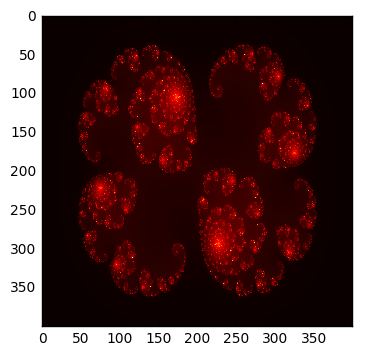

In [37]:
c = 0.285+0.01j
xs = np.linspace(-1.4, 1.4, 400)
ys = np.linspace(-1, 1, 400)
%time grid = julia(xs, ys, c)
plt.imshow(grid, cmap='hot', interpolation='nearest')
pass

In [38]:
@njit
def cabs2(z):
    return z.real**2 + z.imag**2

@njit
def f(z, c, max_iter):
    for i in range(max_iter):
        z = z*z + c
        if cabs2(z) > 4:
            return i
    return i

@njit
def julia(xs, ys, c, max_iter= 1000):
    grid = np.empty((len(ys), len(xs)))
    for a, x in enumerate(ys):
        for b, y in enumerate(xs):
            z = x + y*1.0j
            grid[a, b] = f(z, c, max_iter)
    return grid

CPU times: user 310 ms, sys: 5.7 ms, total: 315 ms
Wall time: 313 ms


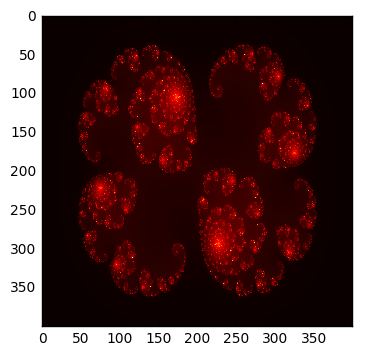

In [39]:
c = 0.285+0.01j
xs = np.linspace(-1.4, 1.4, 400)
ys = np.linspace(-1, 1, 400)
%time grid = julia(xs, ys, c)
plt.imshow(grid, cmap='hot', interpolation='nearest')
pass